In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
files = glob('data/*.xls')
files

['data/0ml.xls']

In [3]:
def process(file_path, factor):

    """
    file_path has to be str.
    factor is 1 if measured unit is mV and 1000 if unit is V.
    """

    init_data = pd.read_excel(file_path)
    data = init_data[['Date&Time', 'Unit']]
    values = []

    for i in init_data['MainValue']:
        value = i.replace(',', '.')
        values.append(float(value)*factor)

    data.insert(loc = 1, column = 'Value', value = values)

    return data

In [4]:
for file in files:
    data = process(file, 1)

In [5]:
data

,Date&Time,Value,Unit
0,2022-04-19 11:58:14,154.64,mV
1,2022-04-19 11:58:14,153.96,mV
2,2022-04-19 11:58:14,153.22,mV
3,2022-04-19 11:58:14,153.65,mV
4,2022-04-19 11:58:14,153.34,mV
...,...,...,...
65530,2022-04-19 15:32:58,375.72,mV
65531,2022-04-19 15:32:58,376.40,mV
65532,2022-04-19 15:32:58,376.77,mV
65533,2022-04-19 15:32:58,375.25,mV


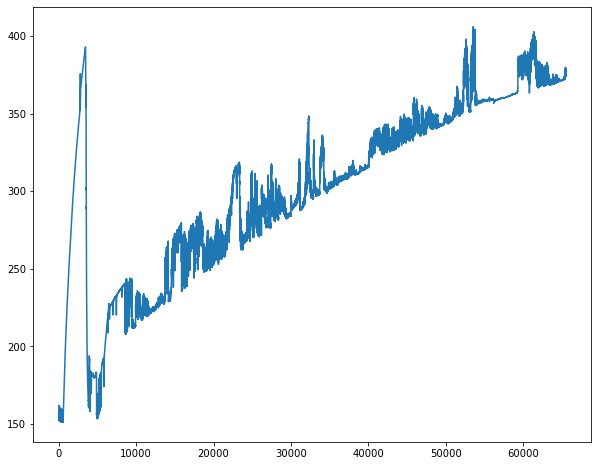

In [10]:
plt.figure(figsize=(10,8))
plt.plot(data[['Value']])